<a href="https://colab.research.google.com/github/AjitSingh108/APPNOO-RESTAURANT/blob/master/Telco_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the file is uploaded to the content directory with the same name
file_path = list(uploaded.keys())[0]
dataframe = pd.read_csv(file_path)

print("Our dataframe....", dataframe)

Saving Telco_Customer_Churn_Dataset  (2).csv to Telco_Customer_Churn_Dataset  (2).csv
Our dataframe....       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService Onl

In [ ]:
display(correlation_matrix[['Churn']])

,Churn
tenure,-0.352229
MonthlyCharges,0.193356
TotalCharges,-0.199484
Churn,1.000000


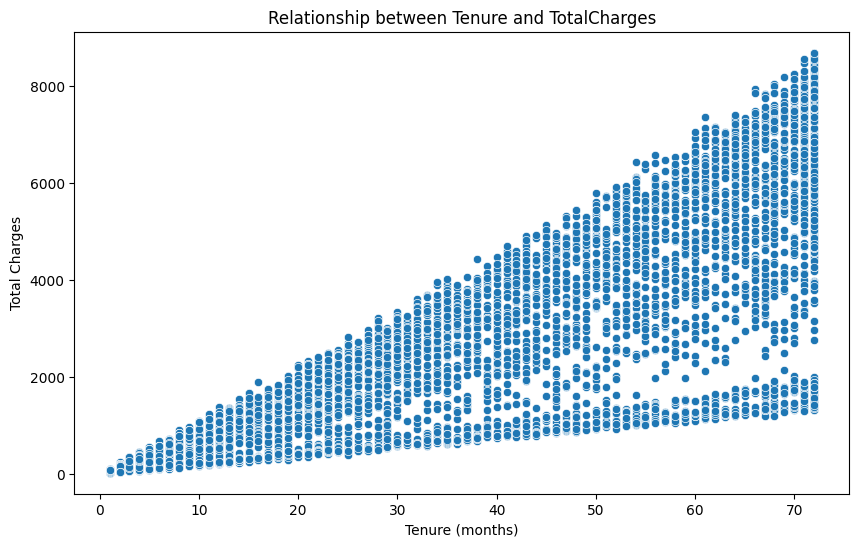

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'TotalCharges' and 'tenure' for plotting
dataframe_cleaned = dataframe.dropna(subset=['TotalCharges', 'tenure'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe_cleaned, x='tenure', y='TotalCharges')
plt.title('Relationship between Tenure and TotalCharges')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.show()

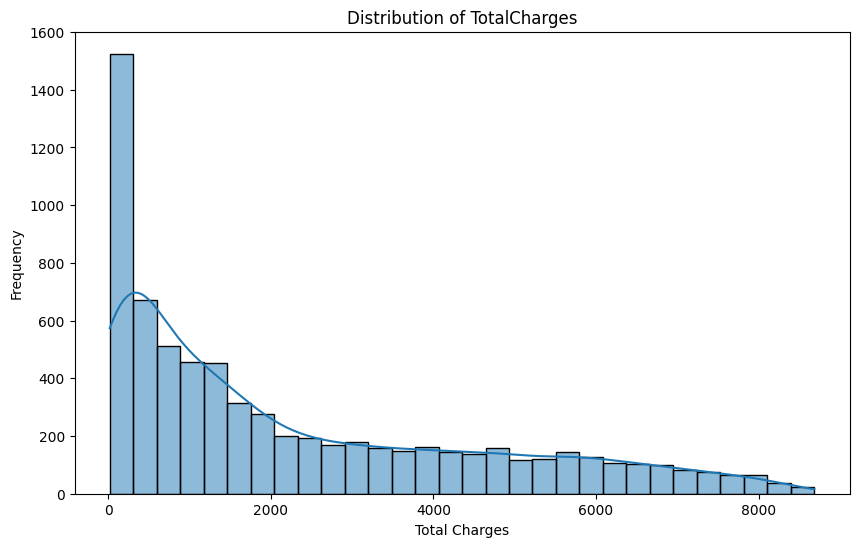

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in 'TotalCharges' for plotting
dataframe_cleaned = dataframe.dropna(subset=['TotalCharges'])

plt.figure(figsize=(10, 6))
sns.histplot(dataframe_cleaned['TotalCharges'], kde=True, bins=30)
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(dataframe.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce')
print(dataframe.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


# Task
Analyze the relationship between the 'Churn' column and other features in the dataframe.

## Analyze the relationship between 'churn' and categorical features

### Subtask:
Visualize the distribution of 'Churn' for each categorical feature using bar plots or count plots to see if certain categories have higher churn rates.


**Reasoning**:
Identify categorical columns and create count plots for each against 'Churn' to visualize their relationship.



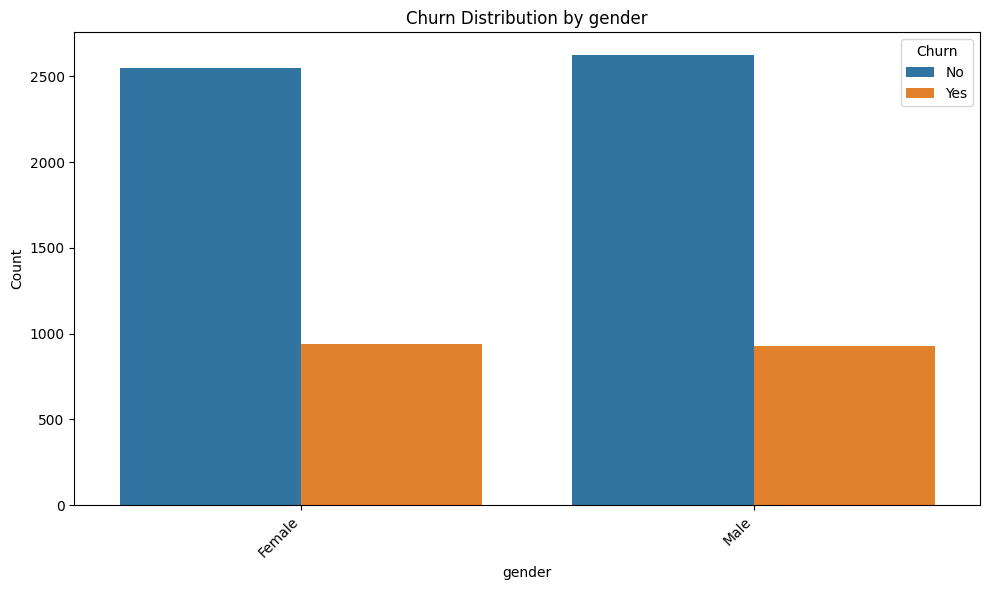

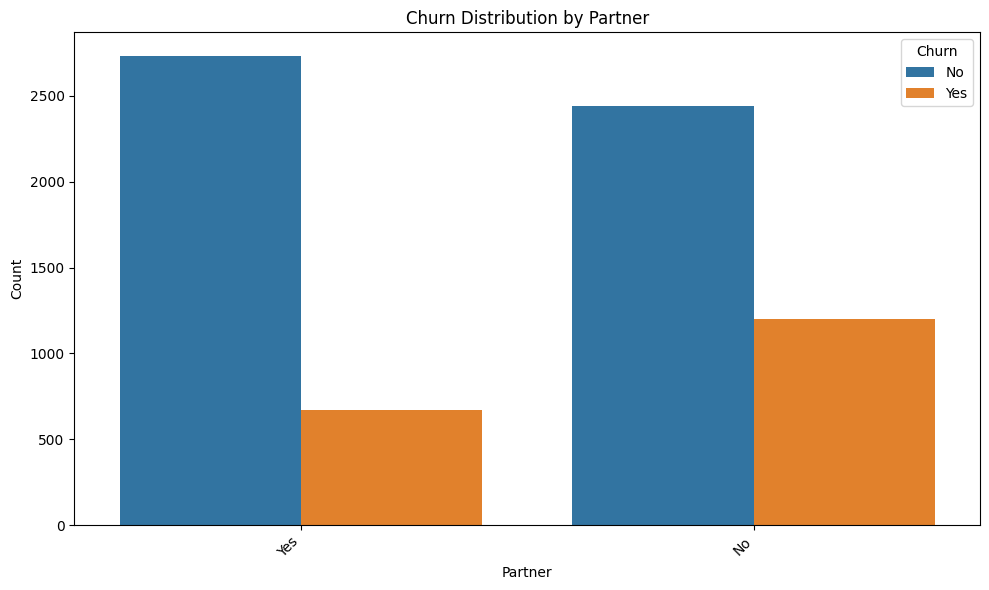

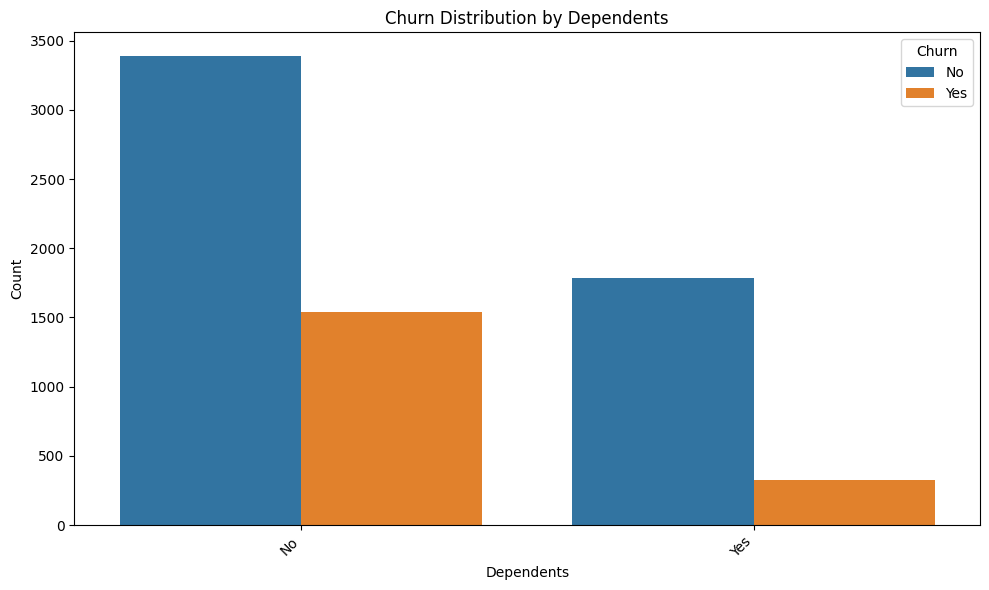

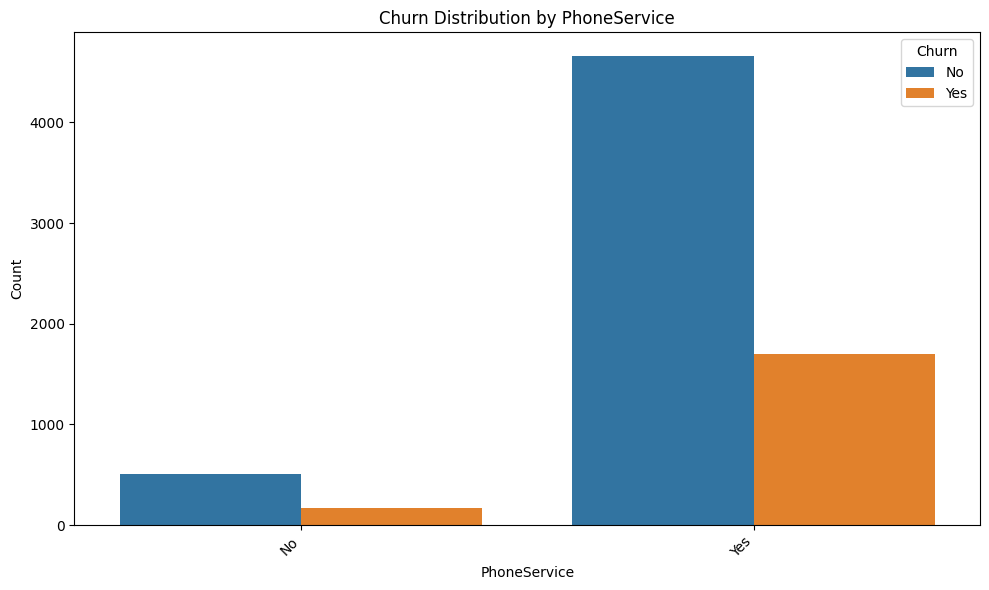

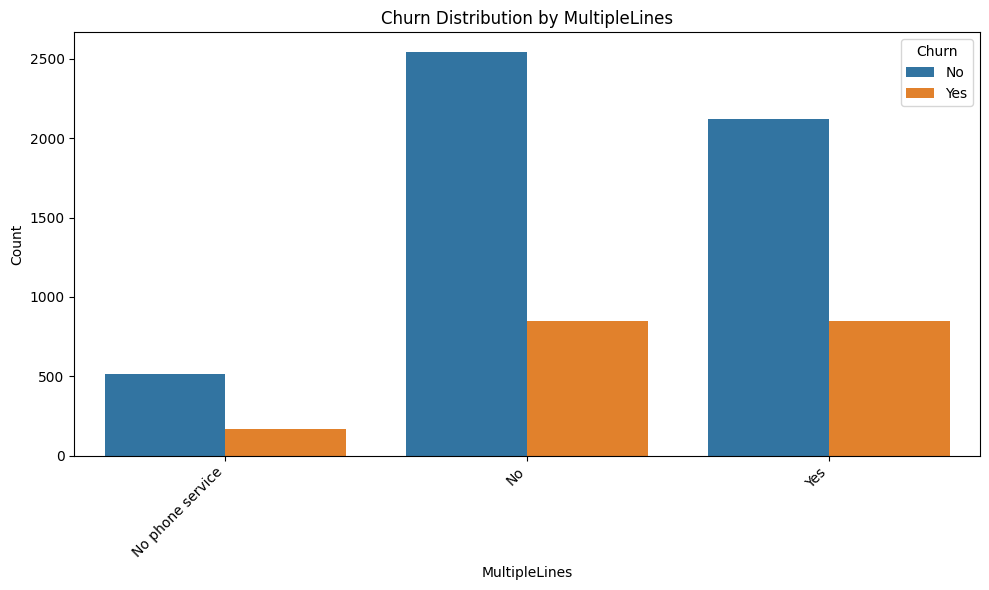

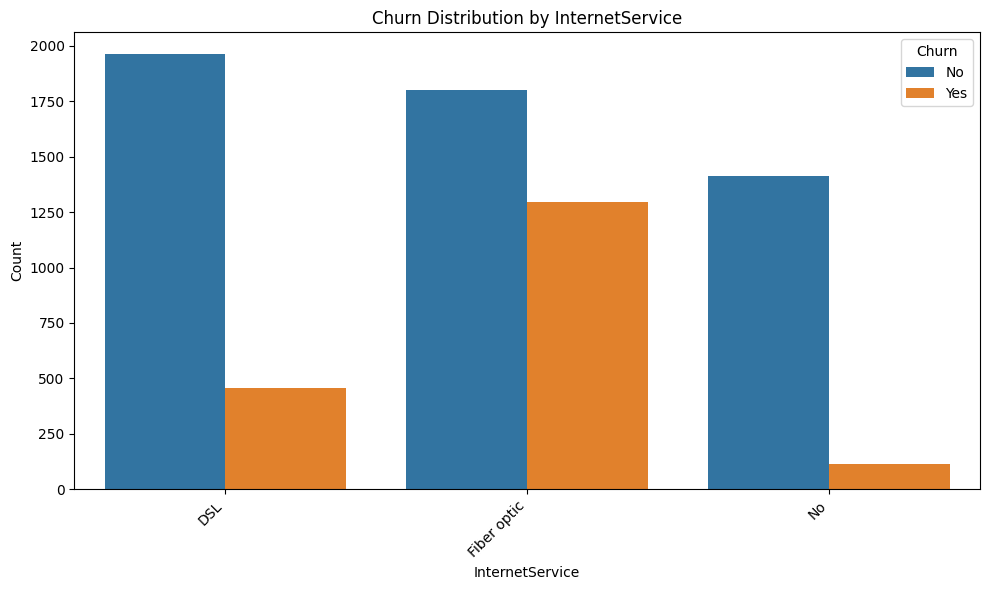

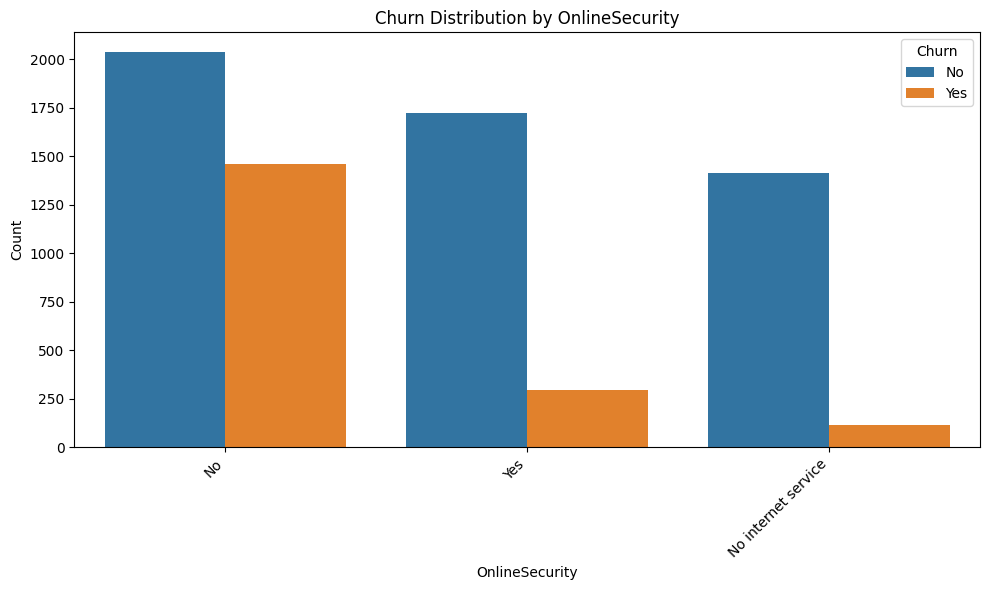

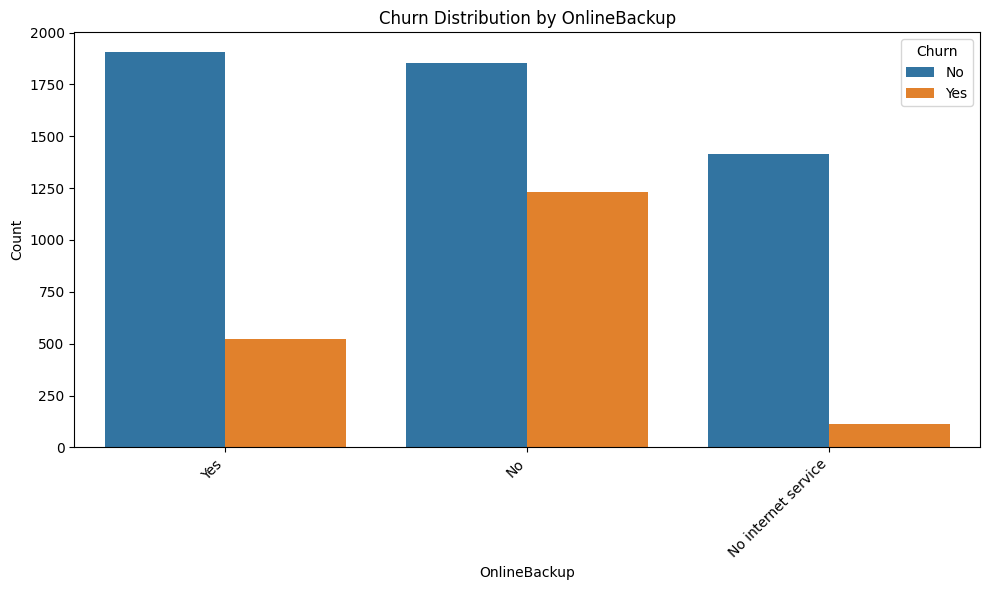

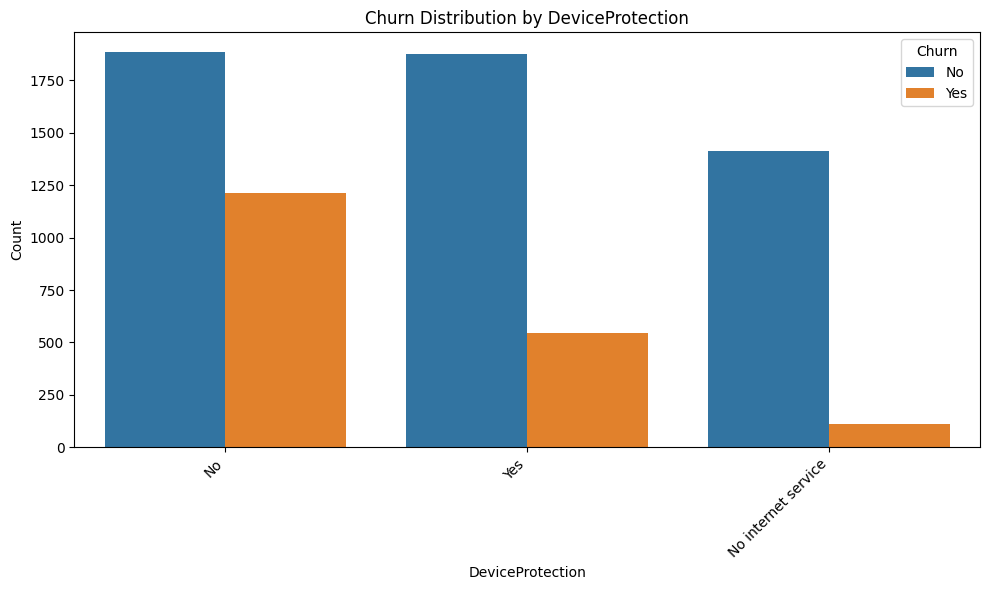

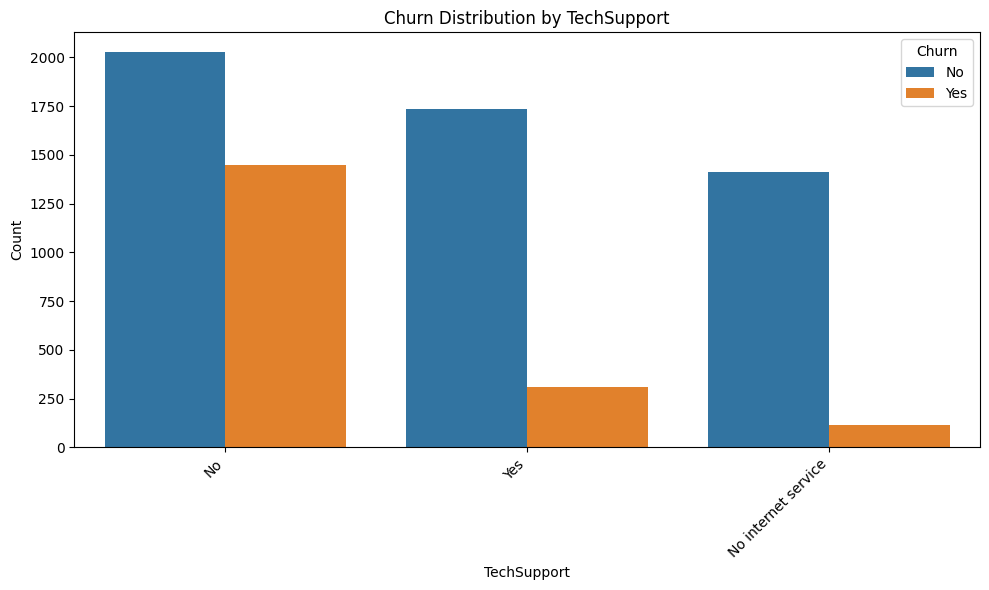

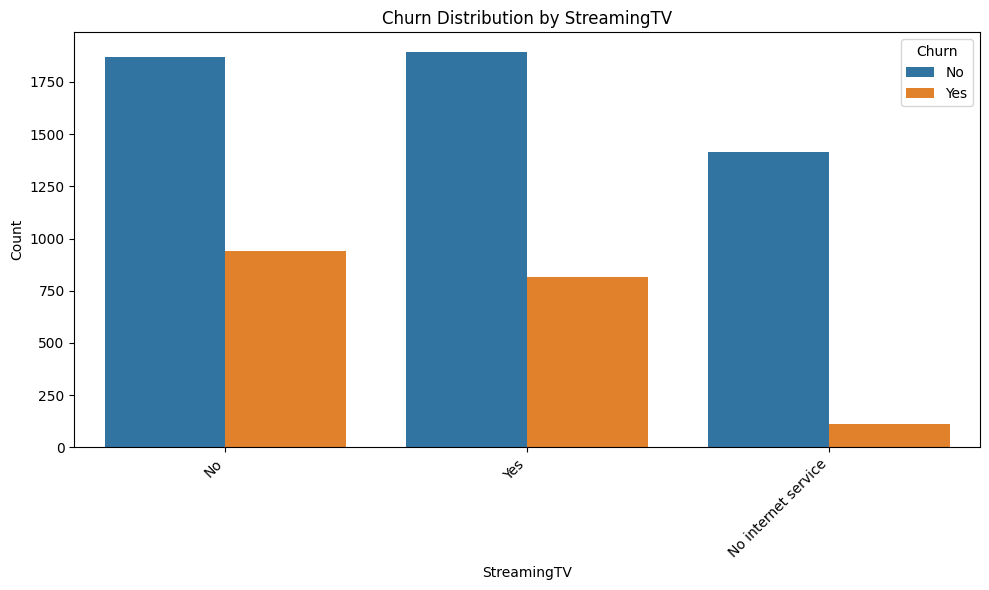

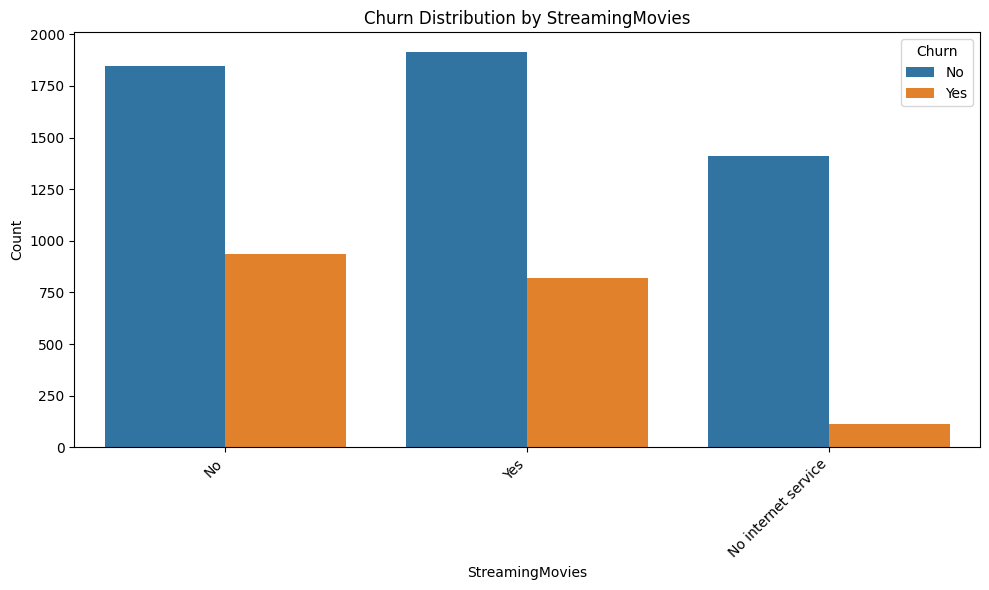

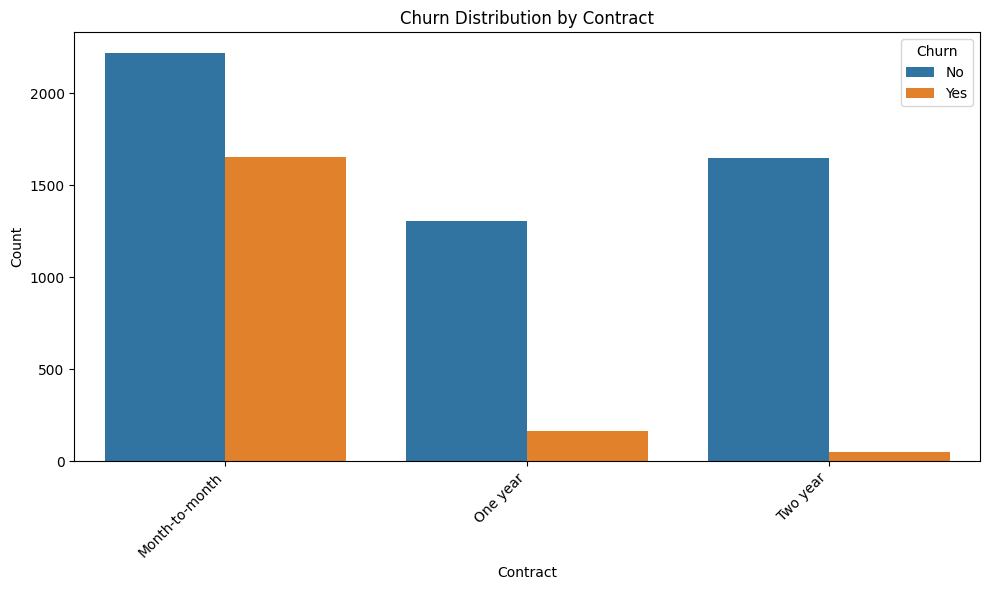

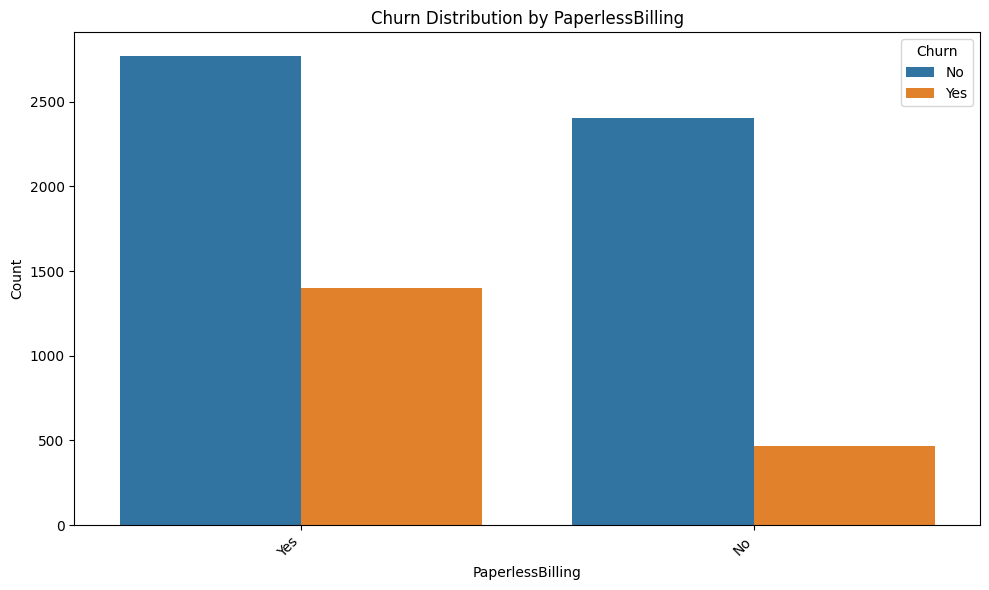

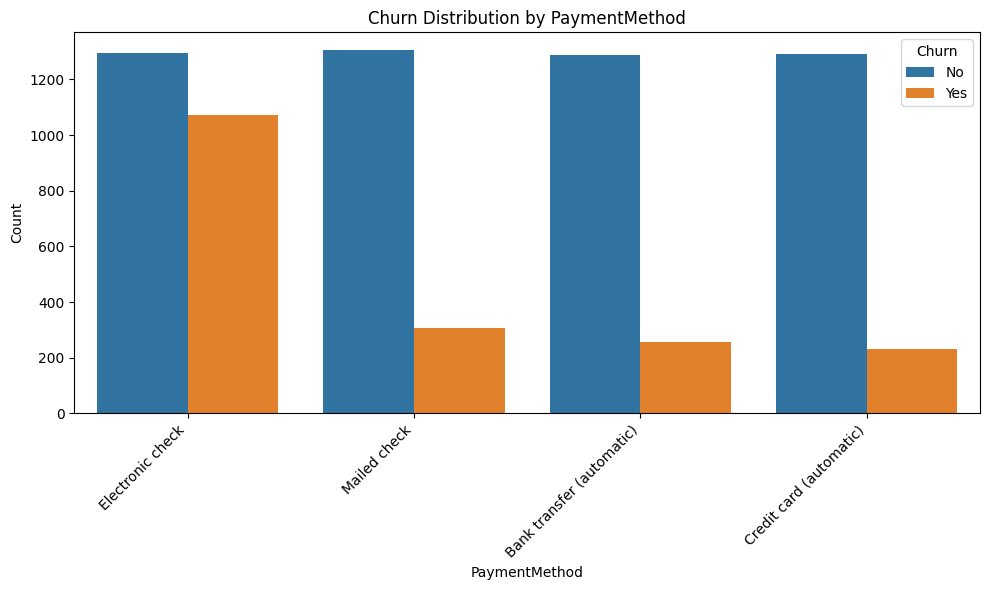

In [ ]:
categorical_cols = dataframe.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataframe, x=col, hue='Churn')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Analyze the relationship between 'churn' and numerical features

### Subtask:
Visualize the distribution of numerical features for each 'Churn' group using histograms or box plots to see if the distributions differ between churned and non-churned customers.


**Reasoning**:
Identify the numerical columns and iterate through them to create box plots visualizing their distribution against 'Churn'.



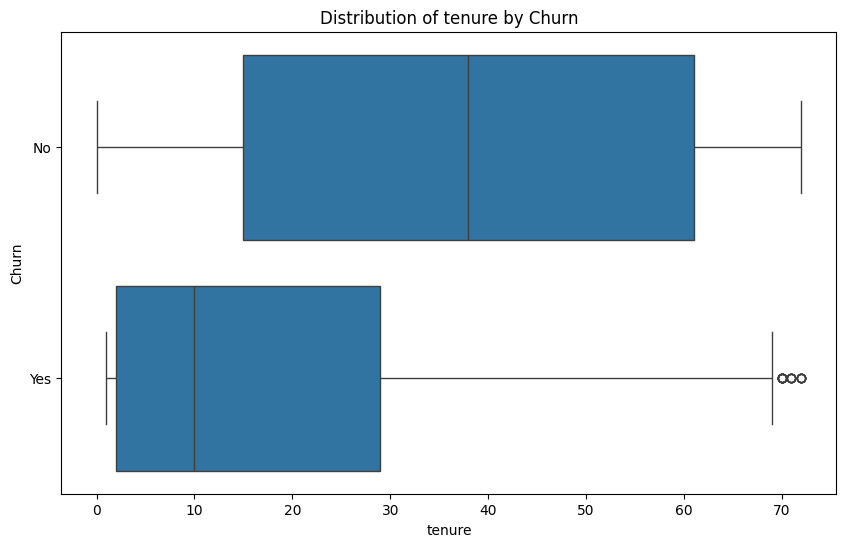

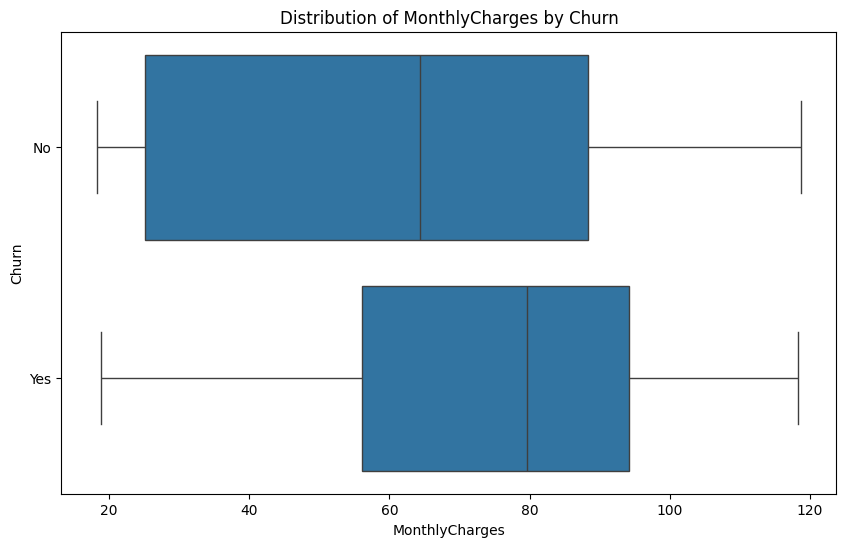

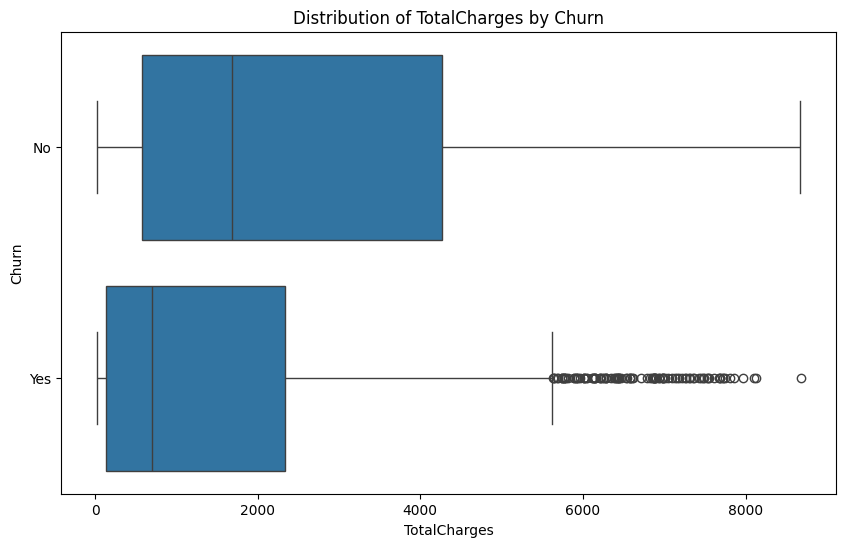

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=col, y='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Churn')
    plt.show()

## Analyze correlations between numerical features and 'churn'

### Subtask:
Calculate and visualize the correlation matrix for numerical features and 'Churn' to identify any strong linear relationships.


**Reasoning**:
Create a new DataFrame with numerical columns and 'Churn', convert 'Churn' to numerical, calculate the correlation matrix, and visualize it with a heatmap.



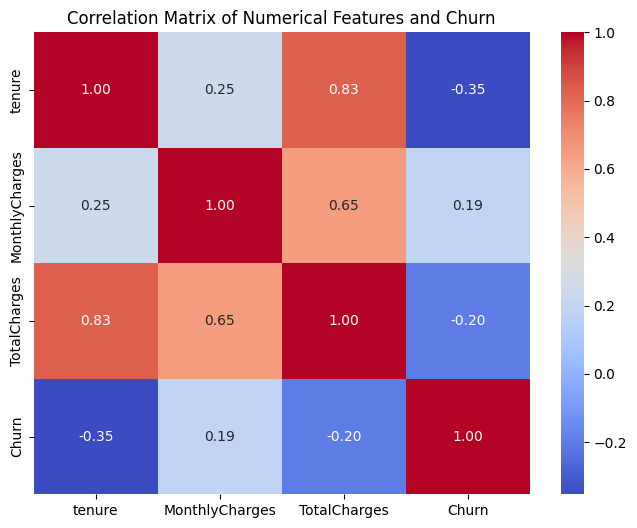

In [ ]:
numerical_churn_df = dataframe[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()
numerical_churn_df['Churn'] = numerical_churn_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

correlation_matrix = numerical_churn_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

## Summarize findings

### Subtask:
Briefly summarize the key relationships found between 'Churn' and other features.


## Summary:

### Data Analysis Key Findings

*   Visualizations of categorical features show variations in churn rates across different categories.
*   Box plots indicate differing distributions of 'tenure', 'MonthlyCharges', and 'TotalCharges' for churned versus non-churned customers.
*   The correlation matrix reveals the linear relationships between 'Churn' and the numerical features, though specific correlation values were not detailed in the final output.

### Insights or Next Steps

*   Focus on the specific categories within categorical features and the ranges within numerical features that show significantly higher churn rates.
*   Further investigate the strength and nature of the correlations between numerical features and churn identified in the correlation matrix.
